In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
ls

 El volumen de la unidad C es Windows-SSD
 El n�mero de serie del volumen es: 30DB-825A

 Directorio de c:\Users\Arturo\Documents\MSC\Subjects\Probabilidad y Estad�stica

12/09/2023  09:42 a. m.    <DIR>          .
12/09/2023  11:01 a. m.    <DIR>          ..
08/09/2023  09:20 a. m.            23,873 Diabetes.csv
08/09/2023  09:19 a. m.            67,706 height_weight.csv
08/09/2023  09:26 a. m.                 0 RepresentacionDatos.py
08/09/2023  09:19 a. m.            18,750 tips.csv
08/09/2023  03:28 p. m.           879,038 U2T1 - Representacion de datos.ipynb
12/09/2023  10:37 a. m.           123,237 U2T2.ipynb
               6 archivos      1,112,604 bytes
               2 dirs  675,337,838,592 bytes libres


In [3]:
dataset = pd.read_csv('height_weight.csv')
dataset.head()

,sex,height,weight
0,1,71.74,259.88
1,1,71.00,186.73
2,2,63.83,172.17
3,1,67.74,174.66
4,2,67.28,169.20


Graficando los datos

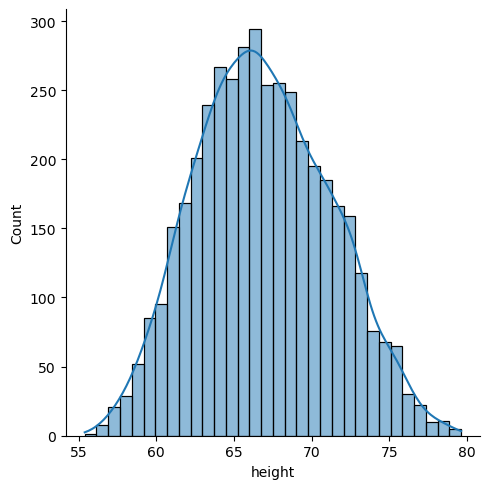

In [4]:
sns.displot(x = 'height', data = dataset, kde = True)
plt.show();

In [5]:
dataset.mean()

sex         1.540061
height     66.903607
weight    174.095122
dtype: float64

In [6]:
np.mean(dataset['height'])

66.90360671236135

In [7]:
dataset.median()

sex         2.00
height     66.63
weight    170.10
dtype: float64

In [8]:
np.median(dataset['height'])

66.63

In [9]:
dataset.mode()

,sex,height,weight
0,2,63.73,161.1


In [10]:
st.mode(dataset['height'])

C:\Users\Arturo\AppData\Local\Temp\ipykernel_18444\2615761653.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  st.mode(dataset['height'])


ModeResult(mode=array([63.73]), count=array([12]))

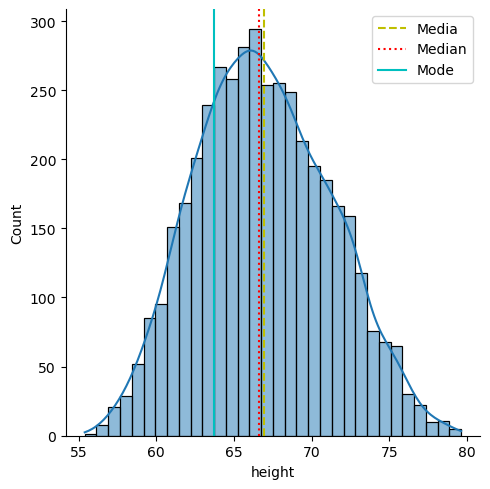

In [11]:
sns.displot(x = 'height', data = dataset, kde = True)
plt.axvline(dataset['height'].mean(), c = 'y', ls = '--', label = 'Media')
plt.axvline(dataset['height'].median(), c = 'r', ls = ':', label = 'Median')
plt.axvline(dataset['height'].mode()[0], c = 'c', label = 'Mode')
plt.legend()
plt.show();

In [12]:
np.insert(dataset['height'].to_numpy(), 0, 5000)

array([5000.  ,   71.74,   71.  , ...,   63.69,   62.66,   59.98])

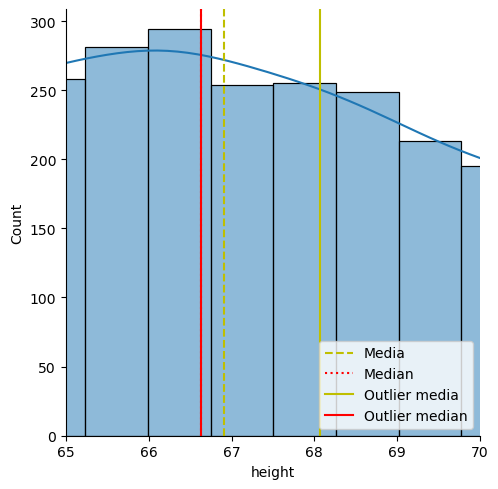

In [13]:
outlier = np.insert(dataset['height'].to_numpy(), 0, 5000)

sns.displot(x = 'height', data = dataset, kde = True)
plt.axvline(dataset['height'].mean(), c = 'y', ls = '--', label = 'Media')
plt.axvline(dataset['height'].median(), c = 'r', ls = ':', label = 'Median')
plt.axvline(np.mean(outlier), c = 'y', ls = '-', label = 'Outlier media')
plt.axvline(np.median(outlier), c = 'r', ls = '-', label = 'Outlier median')

plt.legend()
plt.xlim(65,70)
plt.show();

Medidas de dispersión

Varianza

In [14]:
dataset.var()

sex          0.248454
height      18.602008
weight    1512.912088
dtype: float64

Standard deviation

In [15]:
dataset.std()

sex        0.498451
height     4.313004
weight    38.896171
dtype: float64

Sesgo

In [19]:
st.skew(dataset)#Un poco sesgado a la derecha por su signo positivo

array([-0.16076266,  0.16575947,  0.56608382])

Graficando los datos de peso

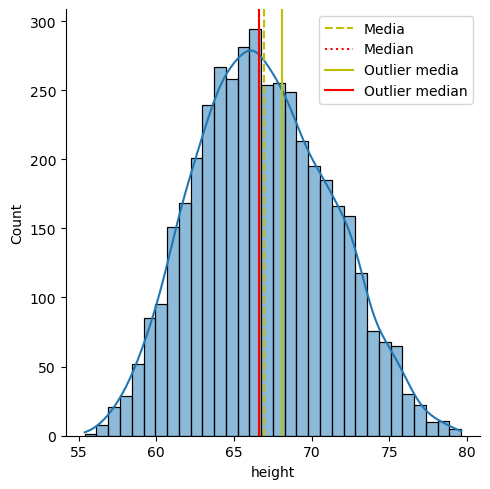

In [20]:
outlier = np.insert(dataset['height'].to_numpy(), 0, 5000)

sns.displot(x = 'height', data = dataset, kde = True)
plt.axvline(dataset['height'].mean(), c = 'y', ls = '--', label = 'Media')
plt.axvline(dataset['height'].median(), c = 'r', ls = ':', label = 'Median')
plt.axvline(np.mean(outlier), c = 'y', ls = '-', label = 'Outlier media')
plt.axvline(np.median(outlier), c = 'r', ls = '-', label = 'Outlier median')

plt.legend()
plt.show();

Curtosis (Anchura de los datos)

In [21]:
st.kurtosis(dataset)

array([-1.97415537, -0.46136531, -0.06064696])

Percentiles

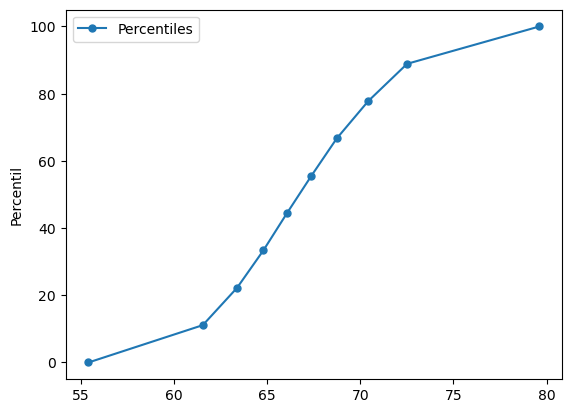

In [25]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(dataset['height'], ps)

xs = np.sort(dataset['height'])
plt.plot(x_p, ps, label = 'Percentiles', marker = '.', ms = 10)
plt.legend()
plt.ylabel('Percentil')
plt.show();

In [28]:
print('La altura del {}% de la muestra es menor o igual a {}'.format(65, np.percentile(dataset['height'], 65)))

La altura del 65% de la muestra es menor o igual a 68.52


Resumen de medidas estadisticas

In [29]:
dataset.describe()

,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


*itlaika*
**bold**
# Heading
## H2
### H3
#### H4 

# Covarianza

In [30]:
dataset[['height', 'weight']].cov()

,height,weight
height,18.602008,78.502181
weight,78.502181,1512.912088


Correlation

In [31]:
dataset[['height', 'weight']].corr()

,height,weight
height,1.000000,0.467945
weight,0.467945,1.000000


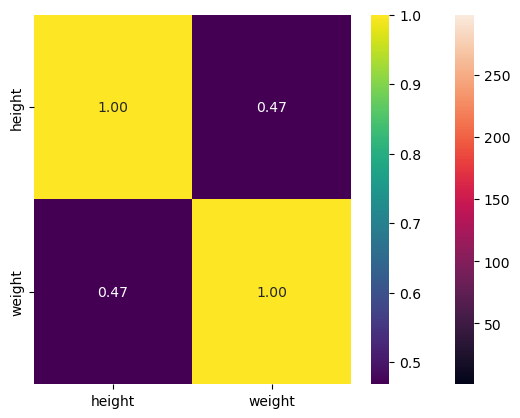

In [33]:
sns.heatmap(dataset[['height', 'weight']].corr(), annot = True, cmap = 'viridis', fmt = '0.2f')
plt.show();